In [1]:
import matplotlib.pyplot as plt
import rasterio

In [2]:
file = './data/backup_classification.tif'
with rasterio.open(file) as src:
    classification = src.read(1)

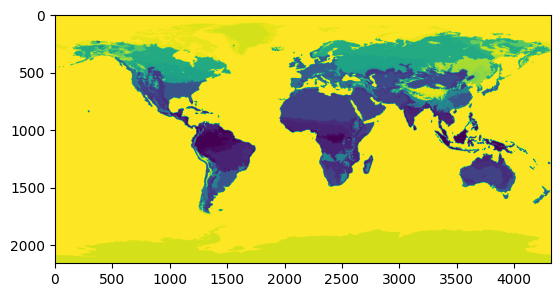

In [5]:
plt.imshow(classification)
plt.imsave('classification.png', classification)
plt.show()